In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import os

# Cargar el shapefile de puntos de estaciones de precipitación
estaciones = gpd.read_file('area_de_estudio\shape\Estaciones_IDEAM\CNE_IDEAM.shp')
cuenca = gpd.read_file('area_de_estudio\shape\cuenca_orinoquia\cuenca_orinoquia.shp')

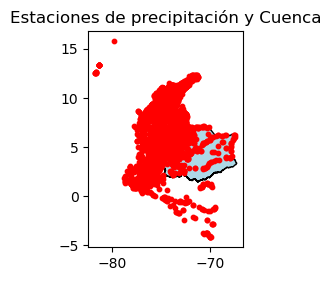

In [ ]:
fig, ax = plt.subplots(figsize=(2, 10))
cuenca.plot(ax=ax, color='lightblue', edgecolor='black')
estaciones.plot(ax=ax, color='red', markersize=10)
ax.set_title('Estaciones de precipitación y Cuenca')
plt.show()

In [ ]:
# Asegurarse de que ambos estén en el mismo sistema de referencia
if estaciones.crs != cuenca.crs:
    estaciones = estaciones.to_crs(cuenca.crs)

# Cortar los puntos al área de la cuenca (seleccionar solo los puntos dentro de la cuenca)
estaciones_en_cuenca = gpd.sjoin(estaciones, cuenca, predicate='within')

# Contar cuántas estaciones hay dentro de la cuenca
num_estaciones = len(estaciones_en_cuenca)

print(f'Número de estaciones de precipitación en la cuenca: {num_estaciones}')

Número de estaciones de precipitación en la cuenca: 561


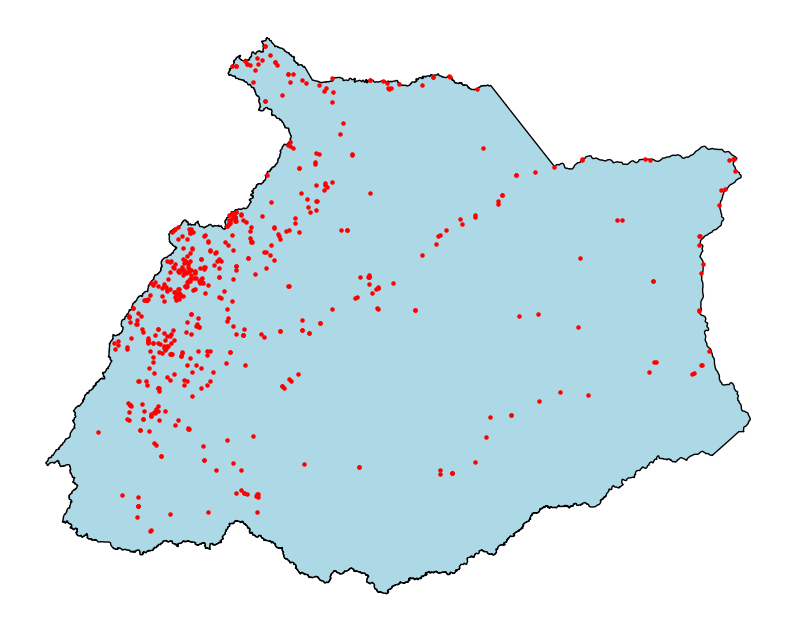

In [22]:
fig, ax = plt.subplots(figsize=(10, 10))
cuenca.plot(ax=ax, color='lightblue', edgecolor='black')
estaciones_en_cuenca.plot(ax=ax, color='red', markersize=5)
#ax.set_title('Estaciones de precipitación y Cuenca')
ax.set_axis_off()
plt.show()

In [17]:
estaciones_en_cuenca.head(2)

,CODIGO,nombre,CATEGORIA,TECNOLOGIA,ESTADO,FECHA_INST,altitud,latitud,longitud,DEPARTAMEN,...,CORRIENTE,FECHA_SUSP,SUBZONA_HI,ENTIDAD,subred,geometry,index_right,NOM_AH,Shape_Leng,Shape_Area
19,3516700232,EL TOBAL [3516700232],LG,TEST001,ESTA001,2021/01/25,3238.0,5.512222,-72.865556,15.0,...,1071.0,0000/00/00,3516.0,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...,None,POINT (-72.86556 5.51222),0,Orinoco,33.668801,28.161948
20,3516500203,ALISAL [3516500203],PM,TEST003,ESTA001,2021/01/25,3448.0,5.459722,-72.966667,15.0,...,207.0,0000/00/00,3516.0,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...,None,POINT (-72.96667 5.45972),0,Orinoco,33.668801,28.161948


In [ ]:
# Obtener la lista de archivos .data en la carpeta
folder = 'datos_ideam\\pp_ideam_crudos'
archivos = [f for f in os.listdir(folder) if f.endswith('.data')]

# Extraer los códigos de estación de los nombres de archivo
codigos_con_datos = [archivo.split('@')[1].split('.')[0] for archivo in archivos]

# Filtrar las estaciones cuyo código está en la lista de códigos con datos
estaciones_con_datos = estaciones_en_cuenca[estaciones_en_cuenca['CODIGO'].astype(str).isin(codigos_con_datos)]

print(f'Estaciones en la cuenca con datos: {len(estaciones_con_datos)}')
estaciones_con_datos.head()

Estaciones en la cuenca con datos: 334


,CODIGO,nombre,CATEGORIA,TECNOLOGIA,ESTADO,FECHA_INST,altitud,latitud,longitud,DEPARTAMEN,...,CORRIENTE,FECHA_SUSP,SUBZONA_HI,ENTIDAD,subred,geometry,index_right,NOM_AH,Shape_Leng,Shape_Area
20,3516500203,ALISAL [3516500203],PM,TEST003,ESTA001,2021/01/25,3448.0,5.459722,-72.966667,15.0,...,207.0,0000/00/00,3516.0,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...,None,POINT (-72.96667 5.45972),0,Orinoco,33.668801,28.161948
73,31095030,PUERTO INIRIDA - AUT [31095030],AM,TEST005,ESTA001,2003/03/27,100.0,3.874417,-67.919056,94.0,...,0.0,0000/00/00,3108.0,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...,"RED ALERTAS - AREA OPERATIVA 03,",POINT (-67.91906 3.87442),0,Orinoco,33.668801,28.161948
93,35225030,MODULOS - AUT [35225030],CO,TEST005,ESTA001,2016/12/15,130.0,4.910472,-71.433056,85.0,...,0.0,0000/00/00,3522.0,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...,"Piedemonte y Altillanura Meta-Csanare-Arauca,R...",POINT (-71.43306 4.91047),0,Orinoco,33.668801,28.161948
103,35215020,AEROPUERTO YOPAL - AUT [35215020],CP,TEST005,ESTA001,2005/11/17,325.0,5.320444,-72.387500,85.0,...,0.0,0000/00/00,3521.0,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...,"Colombia,Piedemonte y Altillanura Meta-Csanare...",POINT (-72.3875 5.32044),0,Orinoco,33.668801,28.161948
120,35160010,POTRERITO AUT [35160010],PM,TEST005,ESTA003,2016/12/31,347.0,5.477583,-72.948611,15.0,...,0.0,0000/00/00,3516.0,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...,None,POINT (-72.94861 5.47758),0,Orinoco,33.668801,28.161948


C:\Users\Miguel Rico\AppData\Local\Temp\ipykernel_12224\2114234510.py:6: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  ax.legend()


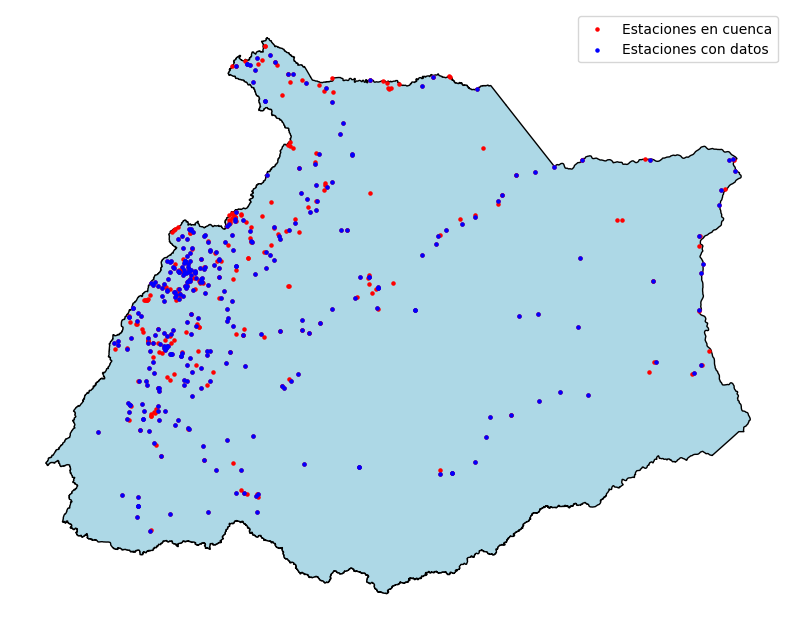

In [27]:
fig, ax = plt.subplots(figsize=(10, 10))
cuenca.plot(ax=ax, color='lightblue', edgecolor='black', label='Cuenca')
estaciones_en_cuenca.plot(ax=ax, color='red', markersize=5, label='Estaciones en cuenca')
estaciones_con_datos.plot(ax=ax, color='blue', markersize=5, label='Estaciones con datos')
ax.set_axis_off()
ax.legend()
plt.show()

In [28]:
estaciones_con_datos.to_excel('estaciones_ideam/estaciones_con_datos.xlsx', index=False)

In [ ]:
# Crear la columna con el formato solicitado
estaciones_archivos = pd.DataFrame({
    'archivo': 'PTPM_CON_INTER@' + estaciones_con_datos['CODIGO'].astype(str)
})

estaciones_archivos.head()

,archivo
20,PTPM_CON_INTER@3516500203
73,PTPM_CON_INTER@31095030
93,PTPM_CON_INTER@35225030
103,PTPM_CON_INTER@35215020
120,PTPM_CON_INTER@35160010


In [32]:
estaciones_archivos.to_excel('datos_ideam/nombre_estaciones/estaciones_todas.xlsx', index=False, header=False)

In [33]:
# Extraer el código de estación de la columna 'archivo'
estaciones_archivos['Codigo'] = estaciones_archivos['archivo'].str.split('@').str[1]

# Hacer el merge para obtener el nombre de la estación
nuevo_df = estaciones_archivos.merge(
    estaciones_con_datos[['CODIGO', 'nombre']],
    left_on='Codigo',
    right_on='CODIGO',
    how='left'
)[['archivo', 'nombre']]

# Renombrar las columnas según lo solicitado
nuevo_df.columns = ['Codigo', 'Nombre']

nuevo_df.head()

,Codigo,Nombre
0,PTPM_CON_INTER@3516500203,ALISAL [3516500203]
1,PTPM_CON_INTER@31095030,PUERTO INIRIDA - AUT [31095030]
2,PTPM_CON_INTER@35225030,MODULOS - AUT [35225030]
3,PTPM_CON_INTER@35215020,AEROPUERTO YOPAL - AUT [35215020]
4,PTPM_CON_INTER@35160010,POTRERITO AUT [35160010]


In [34]:
nuevo_df.to_excel('datos_ideam/nombre_estaciones/nombre_estaciones.xlsx', index=False)